In [1]:
%pip install pandas
%pip install scipy
%pip install numpy
%pip install seaborn
%pip install matplotlib
%pip install statsmodels
%pip install scikit-learn
%pip install shap

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# SereniGuide: a sleep wellness tracking app

<div style="font-style: italic;">
    <br>
    <p style="margin-top: 0; margin-bottom: 0;"> EMPATHY S11 </p>
    <p style="margin-top: 0; margin-bottom: 0;"> Group 2: Bawa, Gomez, Lejano, Nadela, Roxas</p>
</div>

## I. Dataset Description

Sleep is crucial for the overall health of a person and their emotional well-being. It allows the body to recharge so that people can function properly and perform their daily tasks. Sleep efficiency is a metric that measures the percentage of time spent asleep compared to the total time spent in bed. It reflects the effectiveness of sleep duration in relation to the time spent attempting to sleep. 

The dataset this project used is sourced from Kaggle and titled: "Sleep Efficiency Dataset". The dataset provides insights into the sleep patterns of a group of test subjects, including details on their sleep duration, efficiency, stages, and nocturnal awakenings. It also includes information on factors such as caffeine and alcohol consumption, smoking habits, exercise frequency, age, and gender. 

### Collection Methodology

The dataset originates from a research study conducted in Morocco by a team of artificial intelligence engineering students from ENSIAS. Over a period of several months, the team enlisted participants from the local community and gathered data through a blend of self-reported surveys, actigraphy, and polysomnography—a method for monitoring sleep patterns.

### Structure of the Dataset

To take a look at the structure of the dataset, as well as to manipulate and analyze the data, some libraries in Python (such as NumPy and Pandas) are imported. The dataset downloaded from [Kaggle](https://www.kaggle.com/datasets/equilibriumm/sleep-efficiency) is also imported using Pandas.

In [2]:
import numpy as np
import pandas as pd

sleep_df = pd.read_csv("Sleep_Efficiency.csv")

In [3]:
sleep_df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


By using the `head` function, the researchers are able to get a glimpse of some records included in the dataset. Each row represents a specific person and their statistics while each column describe that statistic.

To understand the characteristics of the dataset (insights into the distribution and central tendency) and identify potential outliers, the researchers call the `describe` function which displays the summary statistics of the data.

In [4]:
sleep_df.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


The `info` function is then be used to obtain the number of observations in the dataset as well as to know the data type of each column.

In [5]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

From the results of the `info` function above, the researchers conclude that there are 452 entries in the dataset. Additionally, there are also 15 columns or variables that can be found in the dataset. A brief description of each variable can be seen below.

### Variables Description

<br>

**ID:** a unique identifier for each test subject

**Age:** age of the test subject

**Gender:** male or female

**Bedtime:** the time the test subject goes to bed each night

**Wakeup time:** the time the test subject wakes up each morning 

**Sleep duration:** the total amount of time the test subject slept (in hours) 

**Sleep efficiency:** a measure of the proportion of time in bed spent asleep 

**REM sleep percentage:** the percentage of total sleep time spent in REM sleep 

**Deep sleep percentage:** the percentage of total sleep time spent in deep sleep 

**Light sleep percentage:** the percentage of total sleep time spent in light sleep 

**Awakenings:** the number of times the test subject wakes up during the night 

**Caffeine consumption:** the amount of caffeine consumed in the 24 hours prior to bedtime (in mg) 

**Alcohol consumption:** the amount of alcohol consumed in the 24 hours prior to bedtime (in oz) 

**Smoking status:** whether or not the test subject smokes 

**Exercise frequency:** the number of times the test subject exercises each week

## II. Data Cleaning

### Renaming Column Names

For a more efficient access to the different variables of the dataset, the researchers decided to rename some columns.

In [6]:
sleep_df.rename(columns={ "REM sleep percentage" : "RSP",
                          "Deep sleep percentage" : "DSP",
                          "Light sleep percentage" : "LSP",
                          "Caffeine consumption" : "Caffeine",
                          "Alcohol consumption" : "Alcohol",
                          "Smoking status" : "Smokes",
                         "Sleep duration": "Sleep_Duration",
                          "Exercise frequency" : "Exercises",
                          "Wakeup time" : "Wakeup_Time"}, inplace=True)
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                452 non-null    int64  
 1   Age               452 non-null    int64  
 2   Gender            452 non-null    object 
 3   Bedtime           452 non-null    object 
 4   Wakeup_Time       452 non-null    object 
 5   Sleep_Duration    452 non-null    float64
 6   Sleep efficiency  452 non-null    float64
 7   RSP               452 non-null    int64  
 8   DSP               452 non-null    int64  
 9   LSP               452 non-null    int64  
 10  Awakenings        432 non-null    float64
 11  Caffeine          427 non-null    float64
 12  Alcohol           438 non-null    float64
 13  Smokes            452 non-null    object 
 14  Exercises         446 non-null    float64
dtypes: float64(6), int64(5), object(4)
memory usage: 53.1+ KB


### Addressing Null Values

The first thing the researchers noticed when they performed the `info` function above is that some columns from the dataset do not match the expected number of 452 observations. To address the null values of each variable, the researchers perform the following:

To get the number of null values per column, a `null_counts` variable is initialized that is assigned the sum of null values of each column

In [7]:
null_counts = sleep_df.isna().sum()
print(null_counts)

ID                   0
Age                  0
Gender               0
Bedtime              0
Wakeup_Time          0
Sleep_Duration       0
Sleep efficiency     0
RSP                  0
DSP                  0
LSP                  0
Awakenings          20
Caffeine            25
Alcohol             14
Smokes               0
Exercises            6
dtype: int64


After careful consideration of each column and what it represents, the researchers decided to replace the null values with a value of `0.0` instead of dropping the rows that contains missing data. This is because each of these variables either describes "the number of times" or "the amount of times" the test subject performs something. Thus, a value of `0.0` can represent that these test subjects did not perform these actions.

To replace the missing values with `0.0`, the following code is executed:

In [8]:
sleep_df = sleep_df.fillna(0.0)

null_counts = sleep_df.isna().sum()
print(null_counts)

ID                  0
Age                 0
Gender              0
Bedtime             0
Wakeup_Time         0
Sleep_Duration      0
Sleep efficiency    0
RSP                 0
DSP                 0
LSP                 0
Awakenings          0
Caffeine            0
Alcohol             0
Smokes              0
Exercises           0
dtype: int64


### Multiple Representation

The researchers also decided to check if there are multiple representations of data for object-type data such as `Gender` and `Smoking status`. To do this, the values of these variables and its count are obtained by performing the code below:

In [9]:
gender_counts = sleep_df['Gender'].value_counts()
print(gender_counts)

print("\n")
ss_counts = sleep_df['Smokes'].value_counts()
print(ss_counts)

Gender
Male      228
Female    224
Name: count, dtype: int64


Smokes
No     298
Yes    154
Name: count, dtype: int64


The researchers concluded that there are no multiple representations of data.

### Duplicate Data

The researchers confirm after careful deliberation that duplicate values for each column, except for the individual ID of a test subject, is allowed. Thus the following code is performed to check if by mistake there are duplicate values of ID.

In [10]:
id_duplicates = sleep_df['ID'].duplicated()

id_duplicates_count = id_duplicates.value_counts()
print(id_duplicates_count)

ID
False    452
Name: count, dtype: int64


The researchers confirm that there are no duplicate values in the variable `ID`.

### Incorrect Datatype

While inspecting the datatypes of each variable, the researchers noticed that the variables `REM Sleep Percentage`, `Deep Sleep Percentage`, and `Light Sleep percentage` are in `int64` type. Although this would not cause any errors as long as addressed properly, the researchers decided to convert them in their decimal format and transform the data type to `float64`.

In [11]:
sleep_df['RSP'] = sleep_df['RSP'].astype('float64')
sleep_df['DSP'] = sleep_df['DSP'].astype('float64')
sleep_df['LSP'] = sleep_df['LSP'].astype('float64')

sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                452 non-null    int64  
 1   Age               452 non-null    int64  
 2   Gender            452 non-null    object 
 3   Bedtime           452 non-null    object 
 4   Wakeup_Time       452 non-null    object 
 5   Sleep_Duration    452 non-null    float64
 6   Sleep efficiency  452 non-null    float64
 7   RSP               452 non-null    float64
 8   DSP               452 non-null    float64
 9   LSP               452 non-null    float64
 10  Awakenings        452 non-null    float64
 11  Caffeine          452 non-null    float64
 12  Alcohol           452 non-null    float64
 13  Smokes            452 non-null    object 
 14  Exercises         452 non-null    float64
dtypes: float64(9), int64(2), object(4)
memory usage: 53.1+ KB


Afterwards, each value in all three columns would then be divided by `100.0` to get the equivalent value from its integer form.

In [12]:
sleep_df

,ID,Age,Gender,Bedtime,Wakeup_Time,Sleep_Duration,Sleep efficiency,RSP,DSP,LSP,Awakenings,Caffeine,Alcohol,Smokes,Exercises
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18.0,70.0,12.0,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19.0,28.0,53.0,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20.0,70.0,10.0,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23.0,25.0,52.0,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27.0,55.0,18.0,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22.0,57.0,21.0,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28.0,57.0,15.0,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20.0,32.0,48.0,1.0,0.0,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18.0,72.0,10.0,3.0,0.0,0.0,No,3.0


In [13]:
sleep_df['RSP'] = (sleep_df['RSP'] / 100.0).round(2)
sleep_df['DSP'] = (sleep_df['DSP'] / 100.0).round(2)
sleep_df['LSP'] = (sleep_df['LSP'] / 100.0).round(2)

sleep_df[['RSP', 'DSP', 'LSP']].head()

,RSP,DSP,LSP
0,0.18,0.70,0.12
1,0.19,0.28,0.53
2,0.20,0.70,0.10
3,0.23,0.25,0.52
4,0.27,0.55,0.18


The researchers also noticed that the data type of `Smokes` is Object. To simplify the manipulation of data, the researchers converted the column to int64 data type with 1 serving as True and 0 serving as False.

In [14]:
sleep_df['Smokes'] = sleep_df['Smokes'].map({'Yes': 1, 'No': 0})
sleep_df['Smokes'] = sleep_df['Smokes'].astype('int64')
sleep_df.info()
sleep_df['Smokes'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                452 non-null    int64  
 1   Age               452 non-null    int64  
 2   Gender            452 non-null    object 
 3   Bedtime           452 non-null    object 
 4   Wakeup_Time       452 non-null    object 
 5   Sleep_Duration    452 non-null    float64
 6   Sleep efficiency  452 non-null    float64
 7   RSP               452 non-null    float64
 8   DSP               452 non-null    float64
 9   LSP               452 non-null    float64
 10  Awakenings        452 non-null    float64
 11  Caffeine          452 non-null    float64
 12  Alcohol           452 non-null    float64
 13  Smokes            452 non-null    int64  
 14  Exercises         452 non-null    float64
dtypes: float64(9), int64(3), object(3)
memory usage: 53.1+ KB


0    1
1    1
2    0
3    1
4    0
Name: Smokes, dtype: int64

### Dropping columns that will not be used

To finish the cleaning of the dataset, the researchers decided to drop columns that will not be used for the machine learning algorithm. These columns are `Gender`, `Sleep efficiency`, `Bedtime`, and `Wakeup time`. 

`Gender` was dropped because the machine learning approach that the researchers would use will deal with quantiative data and not categorical data.

`Sleep efficiency` was dropped because it would be difficult to obtain the proportion of time a person spends asleep in their bed.

`Bedtime`, and `Wakeup time` were dropped for similar reasons as `Gender` despite the possibility of both variables being significant factors when it comes to determining the sleep quality of a person (i.e. what is a good time to sleep and what is a good time to wake up could scientifically be proven).

Lastly, `ID` was dropped because it is only used for labelling which user does each instance belong to.


In [15]:
sleep_df.drop(columns=['Gender', 'Sleep efficiency', 'Bedtime', 'Wakeup_Time', 'ID'], inplace=True)
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             452 non-null    int64  
 1   Sleep_Duration  452 non-null    float64
 2   RSP             452 non-null    float64
 3   DSP             452 non-null    float64
 4   LSP             452 non-null    float64
 5   Awakenings      452 non-null    float64
 6   Caffeine        452 non-null    float64
 7   Alcohol         452 non-null    float64
 8   Smokes          452 non-null    int64  
 9   Exercises       452 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 35.4 KB


### Adding Classification Column

The variables `REM Sleep Percentage`, `Deep Sleep Percentage`, and `Light Sleep percentage` are all accumulating to 100. This is shown in the following code:

In [16]:
df = sleep_df[['RSP', 'DSP', 'LSP']].copy()

# Adding a new column with the sum of values from columns 'RSP', 'DSP', 'LSP'
df.loc[:, 'sum_value'] = df['RSP'] + df['DSP'] + df['LSP']

# Checking if each row in 'sum_value' column is equal to 1 and storing the result in a new column
tolerance = 1e-10  # Define a tolerance level
df['is_sum_one'] = np.isclose(df['sum_value'], 1.0, atol=tolerance)

display(df)
print("Number of Rows: ", df.shape[0])

# Counting the number of True values in 'is_sum_one' column
true_count = df['is_sum_one'].sum()

print("Number of True values in 'is_sum_one' column:", true_count)

,RSP,DSP,LSP,sum_value,is_sum_one
0,0.18,0.70,0.12,1.0,True
1,0.19,0.28,0.53,1.0,True
2,0.20,0.70,0.10,1.0,True
3,0.23,0.25,0.52,1.0,True
4,0.27,0.55,0.18,1.0,True
...,...,...,...,...,...
447,0.22,0.57,0.21,1.0,True
448,0.28,0.57,0.15,1.0,True
449,0.20,0.32,0.48,1.0,True
450,0.18,0.72,0.10,1.0,True


Number of Rows:  452
Number of True values in 'is_sum_one' column: 452


The researchers viewed this as the probability of whether the instance's major type of sleep is either `REM Sleep`, `Deep Sleep`, and `Light Sleep`. Therefore, for the machine learning model to predict such classification, a new column named `Sleep_Type` is appended, where the values are the classifications `REM`, `Deep`, and `Light`.

In [17]:
sleep_df['Sleep_Type'] = sleep_df[['RSP', 'DSP', 'LSP']].idxmax(axis=1)

In [18]:
# Mapping the max_value to sleep types
sleep_type_map = {'RSP': 'REM', 'DSP': 'Deep', 'LSP': 'Light'}
sleep_df['Sleep_Type'] = sleep_df['Sleep_Type'].map(sleep_type_map)

In [19]:
sleep_df['Sleep_Type'].value_counts()

Sleep_Type
Deep     339
Light    113
Name: count, dtype: int64

### Converting Classes

Since the `Sleep_Type` feature will be used as the ground truth classes for machine learning, it is important to change its string values to integer. The code below maps the classifications into the following: `REM = 0`, `Deep = 1`, and `Light = 2`.

In [20]:
classes = {
    "REM": 0,
    "Deep": 1,
    "Light": 2
}

sleep_df['Sleep_Type'] =  sleep_df['Sleep_Type'].map(classes)

In [21]:
sleep_df

,Age,Sleep_Duration,RSP,DSP,LSP,Awakenings,Caffeine,Alcohol,Smokes,Exercises,Sleep_Type
0,65,6.0,0.18,0.70,0.12,0.0,0.0,0.0,1,3.0,1
1,69,7.0,0.19,0.28,0.53,3.0,0.0,3.0,1,3.0,2
2,40,8.0,0.20,0.70,0.10,1.0,0.0,0.0,0,3.0,1
3,40,6.0,0.23,0.25,0.52,3.0,50.0,5.0,1,1.0,2
4,57,8.0,0.27,0.55,0.18,3.0,0.0,3.0,0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
447,27,7.5,0.22,0.57,0.21,0.0,0.0,0.0,0,5.0,1
448,52,6.0,0.28,0.57,0.15,4.0,25.0,0.0,0,3.0,1
449,40,8.5,0.20,0.32,0.48,1.0,0.0,3.0,1,0.0,2
450,45,7.0,0.18,0.72,0.10,3.0,0.0,0.0,0,3.0,1


In [22]:
# Count occurrences of 0, 1, and 2 in the specified column
count_0 = (sleep_df['Sleep_Type'] == 0).sum()
count_1 = (sleep_df['Sleep_Type'] == 1).sum()
count_2 = (sleep_df['Sleep_Type'] == 2).sum()

print("Count of 0s:", count_0)
print("Count of 1s:", count_1)
print("Count of 2s:", count_2)

Count of 0s: 0
Count of 1s: 339
Count of 2s: 113


Looking at the counts per sleep type, it is evident that there are *zero* counts for REM Sleep. This results in the machine learning model not being able to account for the REM Sleep type. Because of the fact that the preliminary dataset Sleep Efficiency Dataset does not have any data with REM Sleep as its highest probability, the researchers opted to drop the `RSP`, `DSP`, and `LSP` columns ans use the `Sleep_Type` column as the target variable. 

In [23]:
sleep_df.drop(['RSP', 'DSP', 'LSP'], axis=1, inplace = True)

Note that the target variable only consists of classifications `Deep Sleep` and `Light Sleep` types. `Sleep_Type` will have its values decremented to have it inlined with the logic of only having two classfications.

In [24]:
sleep_df['Sleep_Type'] = sleep_df['Sleep_Type'] - 1
sleep_df

,Age,Sleep_Duration,Awakenings,Caffeine,Alcohol,Smokes,Exercises,Sleep_Type
0,65,6.0,0.0,0.0,0.0,1,3.0,0
1,69,7.0,3.0,0.0,3.0,1,3.0,1
2,40,8.0,1.0,0.0,0.0,0,3.0,0
3,40,6.0,3.0,50.0,5.0,1,1.0,1
4,57,8.0,3.0,0.0,3.0,0,3.0,0
...,...,...,...,...,...,...,...,...
447,27,7.5,0.0,0.0,0.0,0,5.0,0
448,52,6.0,4.0,25.0,0.0,0,3.0,0
449,40,8.5,1.0,0.0,3.0,1,0.0,1
450,45,7.0,3.0,0.0,0.0,0,3.0,0


The `Sleep_Type` column now maps the classifications into the following: `Deep = 0`, and `Light = 1`.

In [25]:
sleep_df['Sleep_Type'].value_counts()

Sleep_Type
0    339
1    113
Name: count, dtype: int64

## III. Feature Engineering

### Normal Distribution Graphs

The researchers plotted the distribution of each feature to check whether they are positively skewed, negatively skewed, or in normal distribution. In this notebook, the distribution is implemented using `matplotlib.pyplot`. 

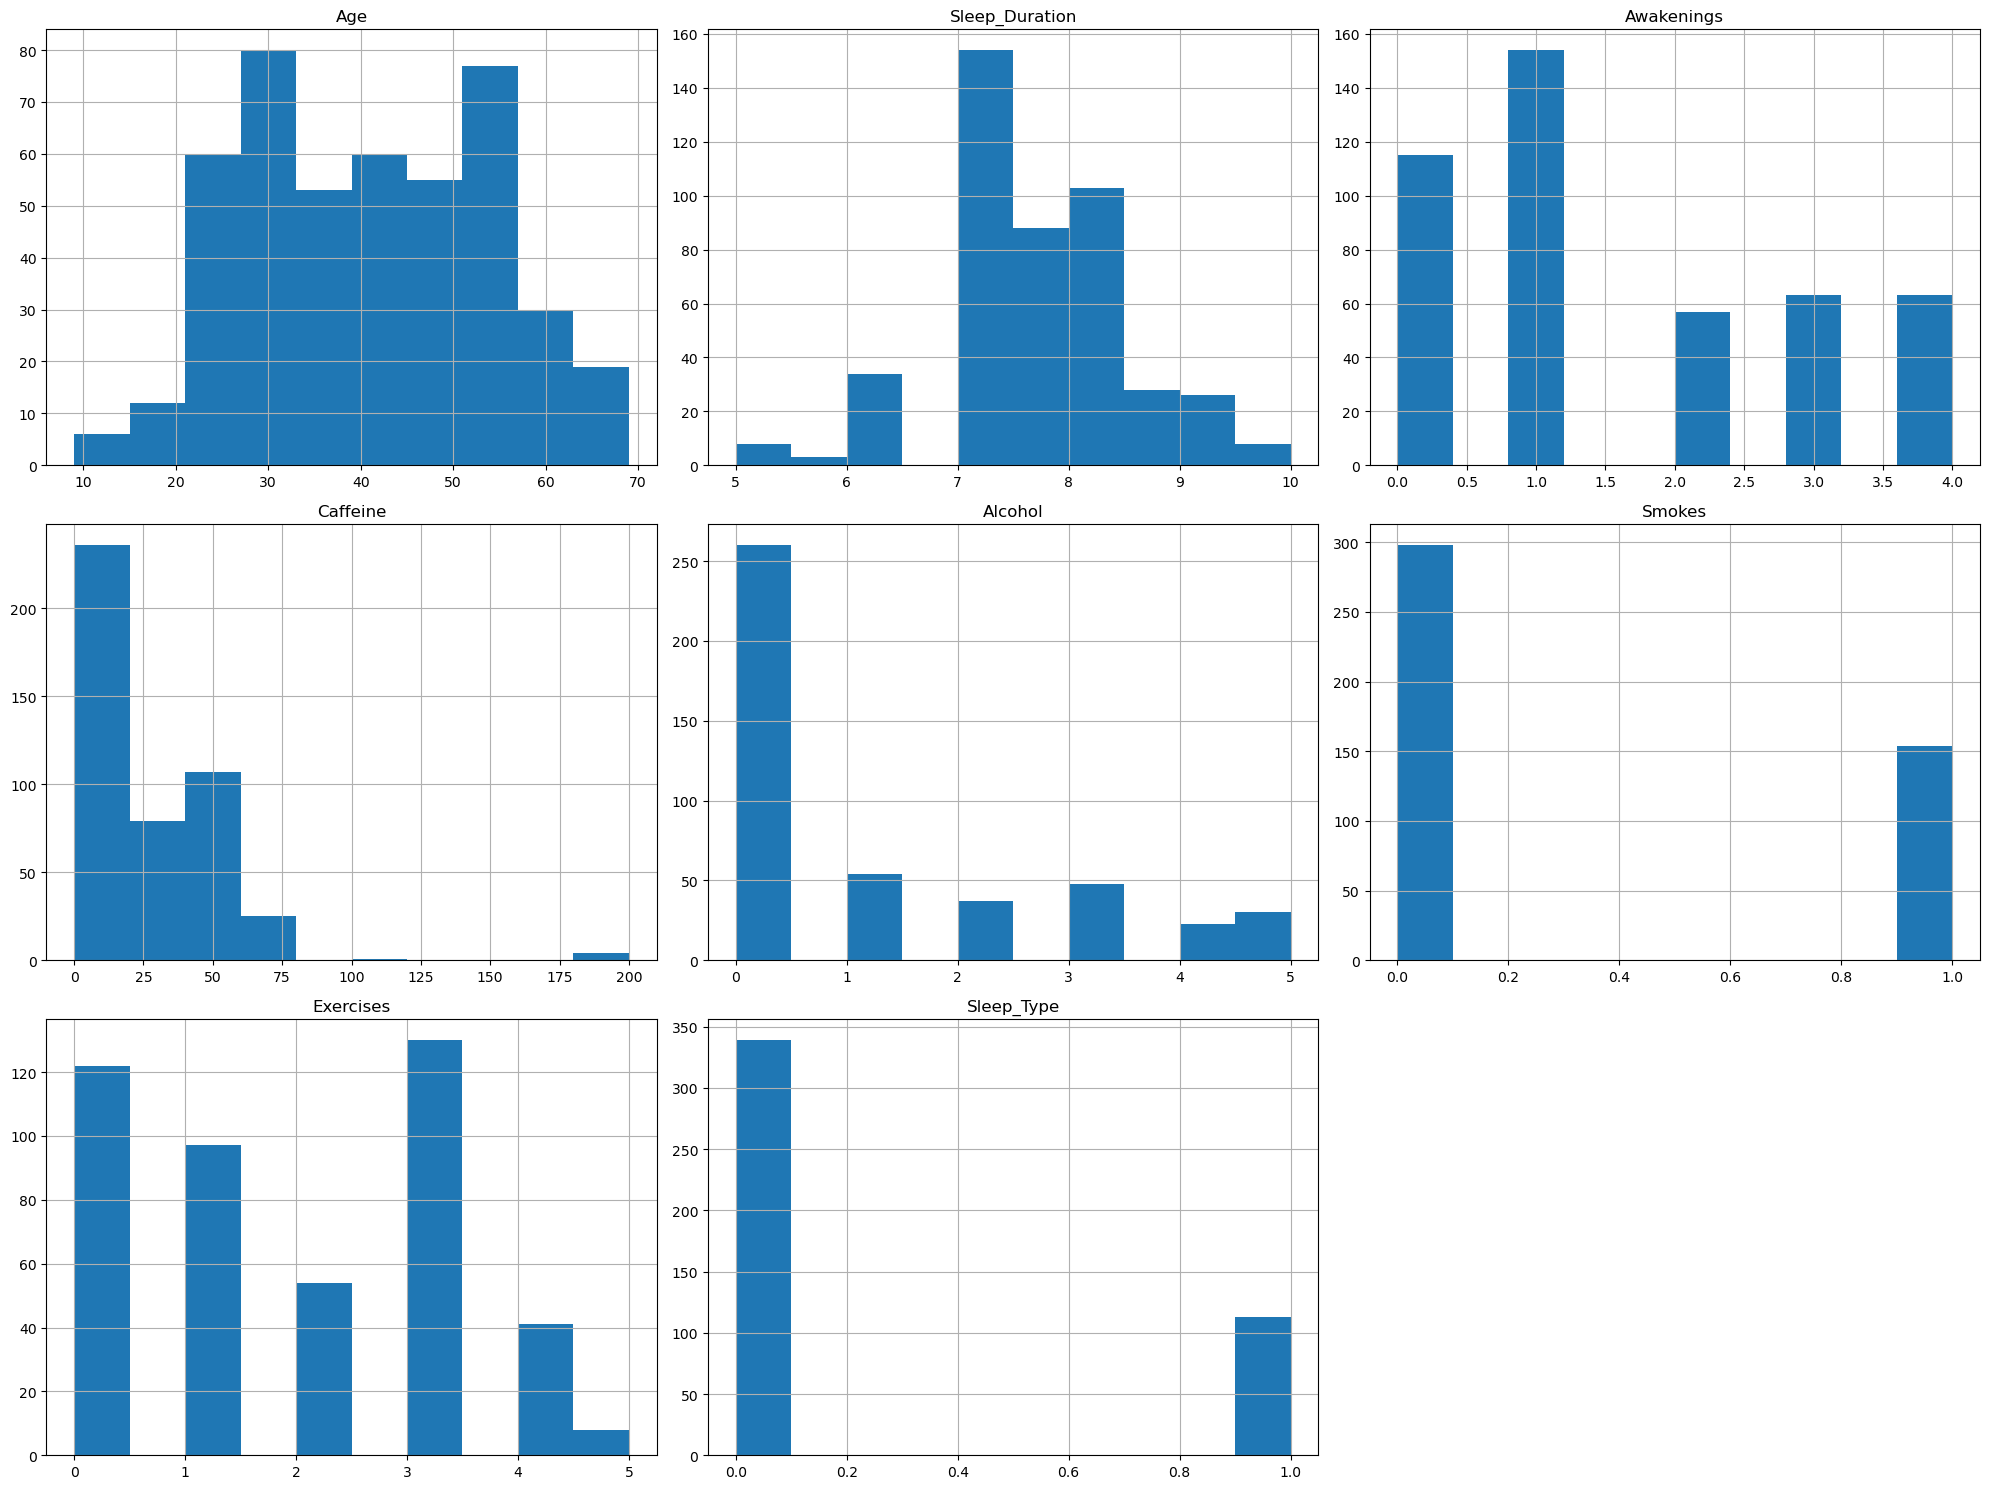

In [26]:
import matplotlib.pyplot as plt

# Plot the distribution of each column in the DataFrame
sleep_df.hist(figsize=(20, 15))
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

As displayed above, each feature has varying distributions. This might not be beneficial regardless of whichever machine learning model is used in this notebook. The nature of some data is also inconsistent, which will lead to a bad performance of the model. For example `Caffeine` has a measurement of milligrams (mg) while `Alcohol` is measured in ounces (oz). It is best to convert from *mg* to *oz* or vice versa for these two to be accurately compared. 

The mean and standard deviation of each feature is shown below using `pd.describe()`.

In [27]:
sleep_df[['Caffeine', 'Alcohol']].describe()

,Caffeine,Alcohol
count,452.000000,452.000000
mean,22.345133,1.137168
std,29.848626,1.608938
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,50.000000,2.000000
max,200.000000,5.000000


As observed above, the standard deviation of features `Age`, `Sleep_Duration`, `Awakenings`, `Caffeine`, `Alcohol`, and `Exercises` are of high value. Meaning, they have a wide range and that data is spread out - which, potentially create false-outliers. This will be challenging for the machine learning model to identify patterns between the features and will result to a more inaccurate classification. Hence, it is important to normalize these features so that most data will be of equal importance to the model.  

### Alcohol and Caffeine Conversion

As stated, the `Caffeine` feature is in units of milligrams while the `Alcohol` feature is in units of ounces. To convert mg to ounces or vice versa, the units must be converted to *grams (g)* first. The following are the conversion units of each:

* `1 ounce = 28.349523125 grams` from GfG (2023)
* `1 gram = 1000 milligrams` from Milligrams and Grams Converter (n.d.)


The formula to convert from one unit to another is as follows:

| **oz to mg**       | **mg to oz**       |
|------------------|------------------|
| $$milligrams = oz \times \frac{28.349523125 g}{1.0 oz}\times{\frac{1000.0 mg}{1.0 g}}$$     | $$ounces = mg \times \frac{1.0 g}{1000.0 mg}\times{\frac{1.0 oz}{28.349523125 g}}$$ |



Comparing the mean and standard deviation of `Caffeine` and `Alcohol`, it is clear that `Caffeine` has a higher scale than `Alcohol`. However, the maximum value of `Caffeine` is just 200 milligrams. If this will be converted to ounces, the resulting value will just be **0.00705479239 oz**. This is a significantly low value, and will make the machine learning model biased to `Alcohol` since its maximum value is 5.0 oz.

Therefore, in this notebook, the feature `Alcohol` will be converted to milligrams instead so that it is consistent and of-equal-matter to `Caffeine`. 


**References:** 
* GfG. (2023, September 26). Ounces to grams converter. GeeksforGeeks. https://www.geeksforgeeks.org/ounce-to-gram/
* Milligrams and grams converter. (n.d.). The Calculator Site. https://www.thecalculatorsite.com/conversions/common/mg-to-g.php?wn=google_ads_iframe_%2F1254144%2C5336692%2Fthecalculatorsite_com-pixel1_1&r1=https%3A%2F%2Fwww.thecalculatorsite.com%2Fconversions%2Fcommon%2Fmg-to-g.php

In [28]:
# Conversion factor
oz_to_g = 28.3495
g_to_mg = 1000

#Convert oz to mg
sleep_df['Alcohol'] = sleep_df['Alcohol'] * oz_to_g * g_to_mg

#display dataframe
display(sleep_df)

,Age,Sleep_Duration,Awakenings,Caffeine,Alcohol,Smokes,Exercises,Sleep_Type
0,65,6.0,0.0,0.0,0.0,1,3.0,0
1,69,7.0,3.0,0.0,85048.5,1,3.0,1
2,40,8.0,1.0,0.0,0.0,0,3.0,0
3,40,6.0,3.0,50.0,141747.5,1,1.0,1
4,57,8.0,3.0,0.0,85048.5,0,3.0,0
...,...,...,...,...,...,...,...,...
447,27,7.5,0.0,0.0,0.0,0,5.0,0
448,52,6.0,4.0,25.0,0.0,0,3.0,0
449,40,8.5,1.0,0.0,85048.5,1,0.0,1
450,45,7.0,3.0,0.0,0.0,0,3.0,0


### Data Normalization

#### `Age`, `Sleep_Duration`, `Awakenings`, `Caffeine`, `Alcohol`, and `Exercises`

In [29]:
sleep_df.describe()

,Age,Sleep_Duration,Awakenings,Caffeine,Alcohol,Smokes,Exercises,Sleep_Type
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,40.285398,7.465708,1.568584,22.345133,32238.148230,0.340708,1.767699,0.250000
std,13.172250,0.866625,1.368698,29.848626,45612.592211,0.474472,1.433375,0.433492
min,9.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,7.500000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,52.000000,8.000000,3.000000,50.000000,56699.000000,1.000000,3.000000,0.250000
max,69.000000,10.000000,4.000000,200.000000,141747.500000,1.000000,5.000000,1.000000


As stated, the standard deviation of features `Age`, `Sleep_Duration`, `Awakenings`, `Caffeine`, `Alcohol`, and `Exercises` are of high value, which means that machine learning model will produce a less accurate predicition. To normalize this, the researchers used `sklearn.preprocessing.RobustScaler` since each distribution is inconsistent and there is a presence of outliers on some features (Sklearn.Preprocessing.RobustScaler, n.d.). 

**Reference:**
* sklearn.preprocessing.RobustScaler. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

### Train-Test Split

Using Robust Scaler requires the use of a subset of the overall data known as the **Training Set** to learn how the features will be normalized. A **Test Set**, on the other hand, is being transformed according to the learned ranges of the scaler. This positively affects the realiability of the accuracy because the scaler model is only applying what it has learned from the training set, and the test set itself is not part of the learning process. Therefore, the entire data will not be overfitting when inputting to the machine learning model (which to be discussed later Section 4). 

Meanwhile, the machine learning model is required to have a **Training Target Variable** that serves as the output class at which the training set results to for the purpose of validation and learning. The **Test Target Variable**, on the other hand, acts as the **true classes** of the test set; meaning, the learned model should predict the same classes for each row of test data. The model's accuracy is measured using this principle. 

To achieve this, the researchers used `sklearn.model_selection.train_test_split`, a pre-defined function offered by Scikit which randomly slices the data into train and test subsets (Sklearn.Model_Selection.Train_Test_Split, n.d.). It takes a variable `X = features`, or the columns `Age`, `Sleep_Duration`, `Awakenings`, `Caffeine`, `Alcohol`, and `Exercises`, and `Y = classes` or the column `Sleep_Type`.


**Reference:**
* sklearn.model_selection.train_test_split. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [30]:
from sklearn.model_selection import train_test_split

columns = sleep_df.drop('Sleep_Type', axis=1).columns

X = sleep_df[columns]
y = sleep_df['Sleep_Type']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (316, 7)
Training labels shape:  (316,)
Test data shape:  (136, 7)
Test labels shape:  (136,)


### Using Robust Scaler

To utilize Robust Scaler, instantiate a RobustScaler object and store it in the variable `scaler`.

In [31]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
scaler = RobustScaler()

Then, call the function `RobustScaler.fit_transform` and pass `X_train[columns]` so that the scaler model learns how it should rescale the training set and transforms each feature to fit within its respective scale. Store the scaled data back into `X_train[columns]`.

In [32]:
# Fit the scaler to your data
X_train[columns] = scaler.fit_transform(X_train[columns])

The code below plots each feature of `X_train` after rescaling. 

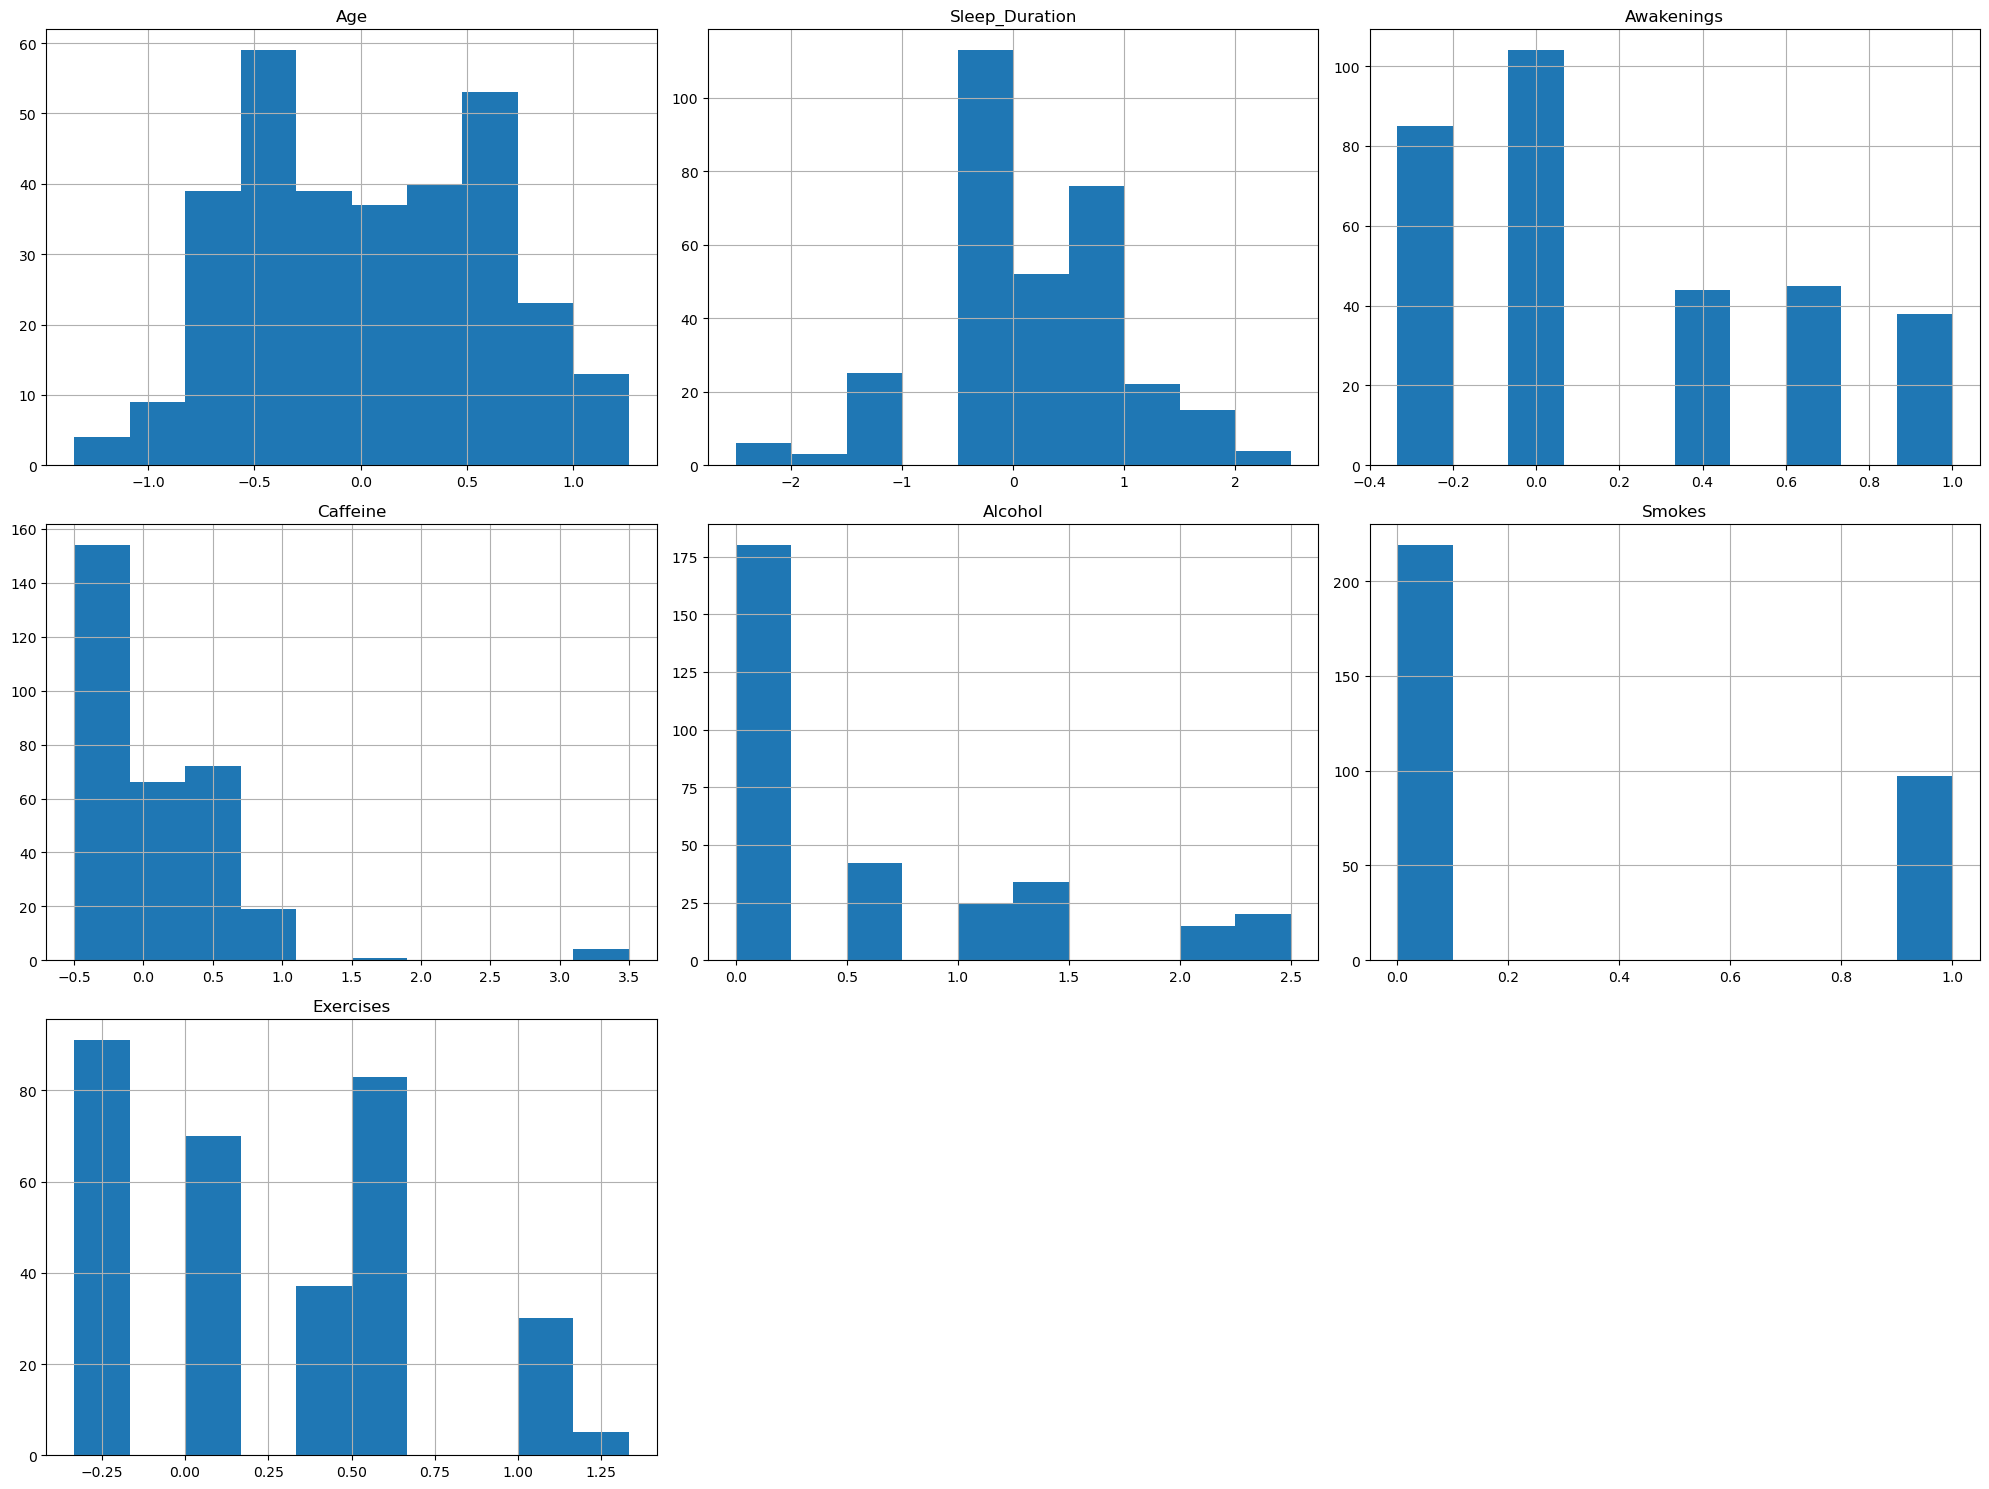

In [33]:
# Plot the distribution of each column in the DataFrame
X_train.hist(figsize=(20, 15))
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

As observed above, the ranges of the distributions of `Age`, `Sleep_Duration`, `Awakenings`, `Caffeine`, `Alcohol`, and `Exercises` are now much smaller. 

In [34]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,316.0,0.016648,0.573845,-1.347826,-0.478261,0.0,0.521739,1.260870
Sleep_Duration,316.0,-0.071203,0.858474,-2.500000,-0.500000,0.0,0.500000,2.500000
Awakenings,316.0,0.171941,0.447182,-0.333333,-0.333333,0.0,0.666667,1.000000
Caffeine,316.0,-0.020570,0.634000,-0.500000,-0.500000,0.0,0.500000,3.500000
Alcohol,316.0,0.560127,0.792540,0.000000,0.000000,0.0,1.000000,2.500000
Smokes,316.0,0.306962,0.461965,0.000000,0.000000,0.0,1.000000,1.000000
Exercises,316.0,0.234177,0.480314,-0.333333,-0.333333,0.0,0.666667,1.333333


Furthermore, their standard deviation has significantly lowered, with no value that is greater than one (1). This means that the data is now much closer to each other, and that the model will now able to predict with a higher accuracy.

Now, call the function `RobustScaler.transform` and pass `X_test[columns]`. This transforms the test set into the learned ranges of the scaler model. Note that the function to call is `.transform` and **not** `.fit_transform`. If `.fit_transform` is called to the test set, the model learns a new scale suitable *only for the test set*, which will make the machine learning model underfit or *not able to learn to predict an accurate class*. 

In [35]:
# Transform the data using the scaler
X_test[columns] = scaler.transform(X_test[columns])

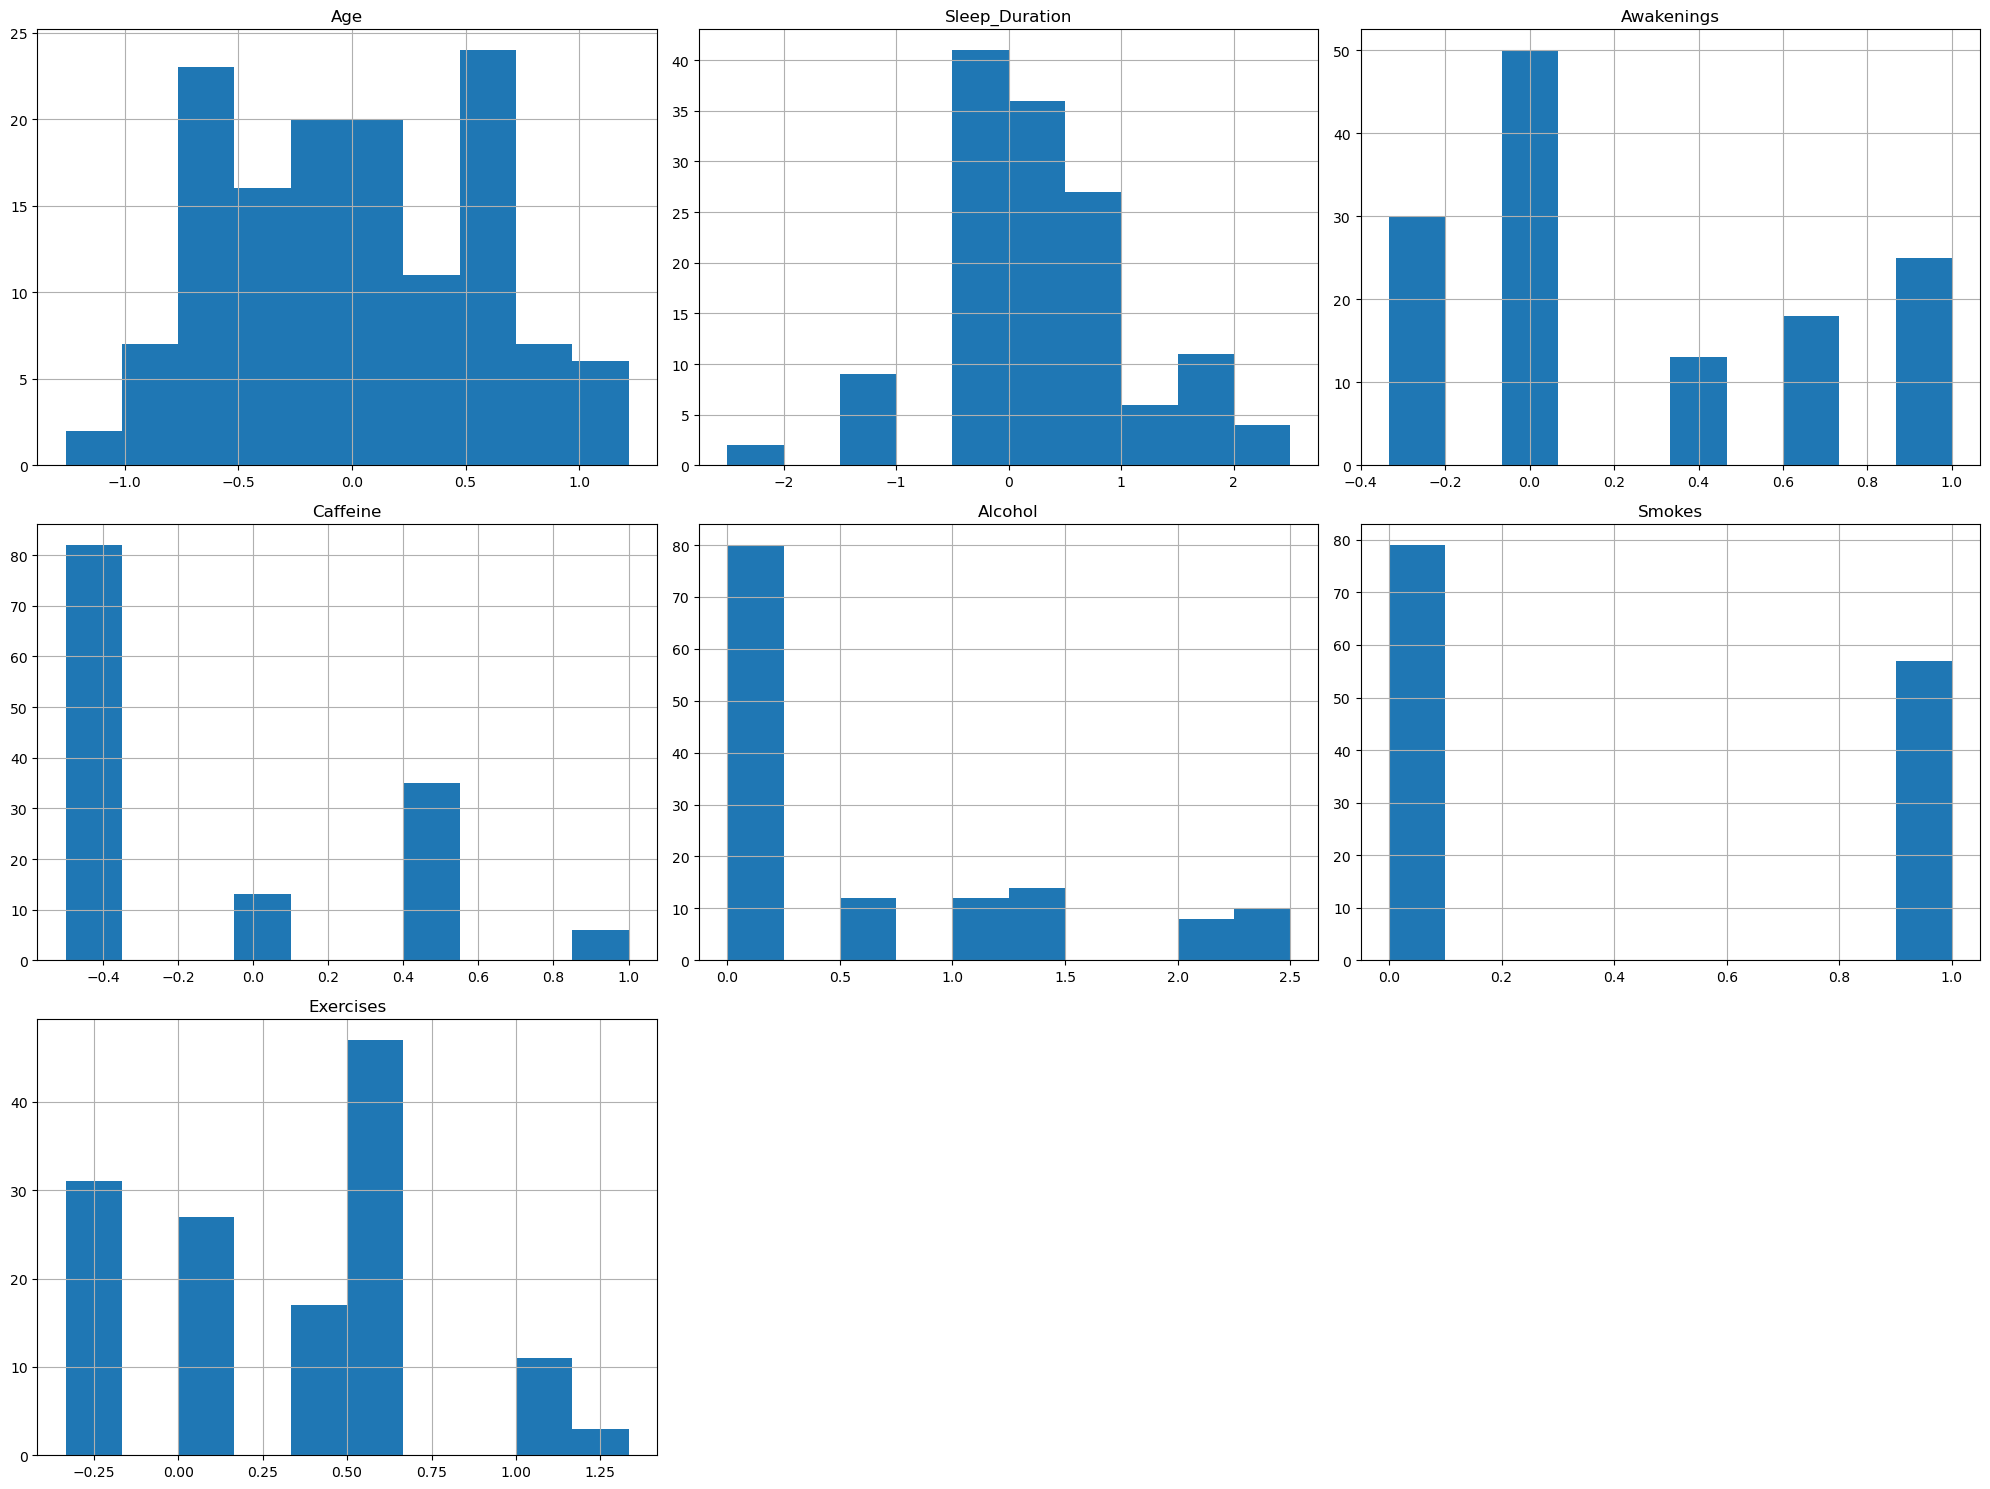

In [36]:
# Plot the distribution of each column in the DataFrame
X_test.hist(figsize=(20, 15))
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

## **IV. Model Training and Hyperparameter Tuning**

In [37]:
import pandas as pd
import numpy as np

scorers = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
}

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Function to perform GridSearchCV and evaluate models
def evaluate_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring=scorers, refit='accuracy', verbose=2)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    
    metrics = {
        'Training Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Training Precision': precision_score(y_train, y_train_pred, average='weighted'),
        'Test Precision': precision_score(y_test, y_test_pred, average='weighted'),
        'Training Recall': recall_score(y_train, y_train_pred, average='weighted'),
        'Test Recall': recall_score(y_test, y_test_pred, average='weighted'),
        'Training F1 Score': f1_score(y_train, y_train_pred, average='weighted'),
        'Test F1 Score': f1_score(y_test, y_test_pred, average='weighted')
    }

    cm = confusion_matrix(y_test, y_test_pred)
    return (metrics, cm)

# Define models and their parameter grids
models = {
    'MLP': (MLPClassifier(), {'max_iter': [3000, 4000, 5000], 'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': [0.0001, 0.001, 0.01]}),
    'SVM-RBF': (SVC(kernel='rbf'), {'max_iter': [3000, 4000, 5000],'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}),
    'Linear SVM': (SVC(kernel='linear'), {'max_iter': [3000, 4000, 5000],'C': [0.1, 1, 10]}),
    'Logistic Regression': (LogisticRegression(), {'max_iter': [3000, 4000, 5000],'C': [0.1, 1, 10]}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [None, 10, 20]}),
    'Naive Bayes': (GaussianNB(), {})
}


# Initialize results dataframe
results_df = pd.DataFrame(columns=['Model', 'Training Accuracy', 'Test Accuracy',
                                   'Training Precision', 'Test Precision',
                                   'Training Recall', 'Test Recall',
                                   'Training F1 Score', 'Test F1 Score'])

In [39]:
# # Evaluate each model
# for model_name, (model, param_grid) in models.items():
#     print("Doing: " + model_name)
#     metrics = evaluate_model(model, param_grid, X_train, y_train, X_test, y_test)
#     metrics['Model'] = model_name
#     results_df = results_df.concat(metrics, ignore_index=True)

# # Display the results
# print(results_df)


In [40]:
print("Doing: MLP" )
model, param_grid = models['MLP']

metrics, cm = evaluate_model(model, param_grid, X_train, y_train, X_test, y_test)
metrics['Model'] = "MLP"

Doing: MLP
Fitting 10 folds for each of 27 candidates, totalling 270 fits
[CV] END alpha=0.0001, hidden_layer_sizes=(50,), max_iter=3000; total time=   1.3s
[CV] END alpha=0.0001, hidden_layer_sizes=(50,), max_iter=3000; total time=   1.5s
[CV] END alpha=0.0001, hidden_layer_sizes=(50,), max_iter=3000; total time=   1.6s
[CV] END alpha=0.0001, hidden_layer_sizes=(50,), max_iter=3000; total time=   1.5s
[CV] END alpha=0.0001, hidden_layer_sizes=(50,), max_iter=3000; total time=   1.5s
[CV] END alpha=0.0001, hidden_layer_sizes=(50,), max_iter=3000; total time=   1.6s
[CV] END alpha=0.0001, hidden_layer_sizes=(50,), max_iter=3000; total time=   1.7s
[CV] END alpha=0.0001, hidden_layer_sizes=(50,), max_iter=3000; total time=   1.8s
[CV] END alpha=0.0001, hidden_layer_sizes=(50,), max_iter=3000; total time=   1.5s
[CV] END alpha=0.0001, hidden_layer_sizes=(50,), max_iter=3000; total time=   1.3s
[CV] END alpha=0.0001, hidden_layer_sizes=(50,), max_iter=4000; total time=   1.2s
[CV] END alph

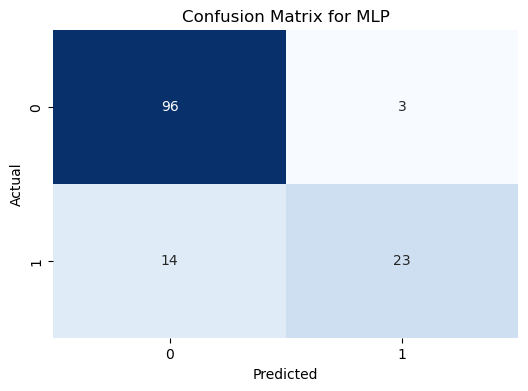

In [41]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f"Confusion Matrix for {metrics['Model']}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [42]:
results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)
results_df

,Model,Training Accuracy,Test Accuracy,Training Precision,Test Precision,Training Recall,Test Recall,Training F1 Score,Test F1 Score
0,MLP,0.952532,0.875,0.952629,0.875962,0.952532,0.875,0.951475,0.867377


In [43]:
print("Doing: SVM-RBF" )
model, param_grid = models['SVM-RBF']

metrics, cm = evaluate_model(model, param_grid, X_train, y_train, X_test, y_test)
metrics['Model'] = "SVM-RBF"

Doing: SVM-RBF
Fitting 10 folds for each of 27 candidates, totalling 270 fits
[CV] END ..................C=0.1, gamma=0.001, max_iter=3000; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, max_iter=3000; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, max_iter=3000; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, max_iter=3000; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, max_iter=3000; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, max_iter=3000; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, max_iter=3000; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, max_iter=3000; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, max_iter=3000; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, max_iter=3000; total time=   0.0s


c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_clas

[CV] END ..................C=0.1, gamma=0.001, max_iter=4000; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, max_iter=4000; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, max_iter=4000; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, max_iter=4000; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, max_iter=4000; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, max_iter=4000; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, max_iter=4000; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, max_iter=4000; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, max_iter=4000; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, max_iter=4000; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, max_iter=5000; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, max_iter=5000; total time=   0.0s
[CV] END ..................C

c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_clas

[CV] END ..................C=0.1, gamma=0.001, max_iter=5000; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, max_iter=5000; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, max_iter=3000; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, max_iter=3000; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, max_iter=3000; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, max_iter=3000; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, max_iter=3000; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, max_iter=3000; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, max_iter=3000; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, max_iter=3000; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, max_iter=3000; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, max_iter=3000; total time=   0.0s
[CV] END ...................

c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_clas

[CV] END ...................C=0.1, gamma=0.01, max_iter=4000; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, max_iter=4000; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, max_iter=4000; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, max_iter=5000; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, max_iter=5000; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, max_iter=5000; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, max_iter=5000; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, max_iter=5000; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, max_iter=5000; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, max_iter=5000; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, max_iter=5000; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, max_iter=5000; total time=   0.0s
[CV] END ...................

c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_clas

[CV] END ....................C=0.1, gamma=0.1, max_iter=3000; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, max_iter=3000; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, max_iter=3000; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, max_iter=3000; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, max_iter=4000; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, max_iter=4000; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, max_iter=4000; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, max_iter=4000; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, max_iter=4000; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, max_iter=4000; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, max_iter=4000; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, max_iter=4000; total time=   0.0s
[CV] END ...................

c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_clas

[CV] END ....................C=0.1, gamma=0.1, max_iter=5000; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, max_iter=5000; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, max_iter=5000; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, max_iter=5000; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, max_iter=5000; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, max_iter=3000; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, max_iter=3000; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, max_iter=3000; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, max_iter=3000; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, max_iter=3000; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, max_iter=3000; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, max_iter=3000; total time=   0.0s
[CV] END ...................

c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_clas

[CV] END ....................C=1, gamma=0.001, max_iter=4000; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, max_iter=4000; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, max_iter=4000; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, max_iter=4000; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, max_iter=4000; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, max_iter=4000; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, max_iter=4000; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, max_iter=5000; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, max_iter=5000; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, max_iter=5000; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, max_iter=5000; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, max_iter=5000; total time=   0.0s
[CV] END ...................

c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_clas

[CV] END .....................C=1, gamma=0.01, max_iter=3000; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, max_iter=3000; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, max_iter=3000; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, max_iter=3000; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, max_iter=3000; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, max_iter=3000; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, max_iter=3000; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, max_iter=3000; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, max_iter=4000; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, max_iter=4000; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, max_iter=4000; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, max_iter=4000; total time=   0.0s
[CV] END ...................

c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_clas

[CV] END .....................C=1, gamma=0.01, max_iter=5000; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, max_iter=5000; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, max_iter=5000; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, max_iter=5000; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, max_iter=5000; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, max_iter=5000; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, max_iter=5000; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, max_iter=5000; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, max_iter=5000; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, max_iter=3000; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, max_iter=3000; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, max_iter=3000; total time=   0.0s
[CV] END ...................

c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_clas

[CV] END ...................C=10, gamma=0.001, max_iter=4000; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, max_iter=4000; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, max_iter=4000; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, max_iter=5000; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, max_iter=5000; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, max_iter=5000; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, max_iter=5000; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, max_iter=5000; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, max_iter=5000; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, max_iter=5000; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, max_iter=5000; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, max_iter=5000; total time=   0.0s
[CV] END ...................

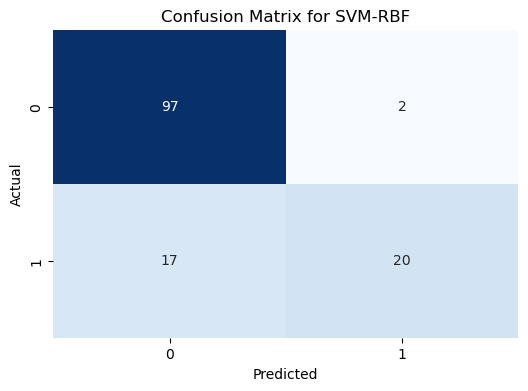

In [44]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f"Confusion Matrix for {metrics['Model']}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [45]:
results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)
results_df

,Model,Training Accuracy,Test Accuracy,Training Precision,Test Precision,Training Recall,Test Recall,Training F1 Score,Test F1 Score
0,MLP,0.952532,0.875000,0.952629,0.875962,0.952532,0.875000,0.951475,0.867377
1,SVM-RBF,0.873418,0.860294,0.870939,0.866715,0.873418,0.860294,0.864564,0.847454


In [46]:
print("Doing: Random Forest" )
model, param_grid = models['Random Forest']

metrics, cm = evaluate_model(model, param_grid, X_train, y_train, X_test, y_test)
metrics['Model'] = "Random Forest"

Doing: Random Forest
Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.1s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.0s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.0s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.1s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.0s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.0s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.0s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.0s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.0s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.0s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.2s
[CV] END ..................

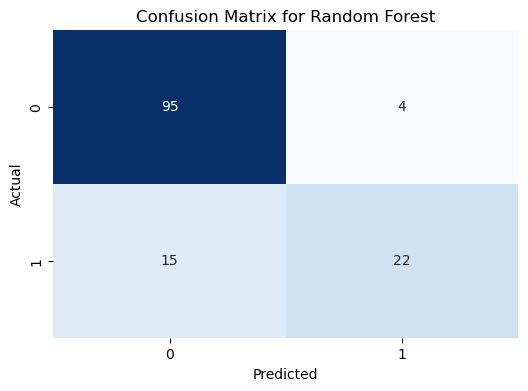

In [47]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f"Confusion Matrix for {metrics['Model']}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [48]:
results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)
results_df

,Model,Training Accuracy,Test Accuracy,Training Precision,Test Precision,Training Recall,Test Recall,Training F1 Score,Test F1 Score
0,MLP,0.952532,0.875000,0.952629,0.875962,0.952532,0.875000,0.951475,0.867377
1,SVM-RBF,0.873418,0.860294,0.870939,0.866715,0.873418,0.860294,0.864564,0.847454
2,Random Forest,1.000000,0.860294,1.000000,0.858880,1.000000,0.860294,1.000000,0.851774


In [49]:
print("Doing: Linear SVM" )
model, param_grid = models['Linear SVM']

metrics, cm = evaluate_model(model, param_grid, X_train, y_train, X_test, y_test)
metrics['Model'] = "Linear SVM"

Doing: Linear SVM
Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END ...............................C=0.1, max_iter=3000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=3000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=3000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=3000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=3000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=3000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=3000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=3000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=3000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=3000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=4000; total time=   0.0s
[CV] END .....................

c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END ...............................C=0.1, max_iter=4000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=4000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=4000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=5000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=5000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=5000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=5000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=5000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=5000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=5000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=5000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=5000; total time=   0.0s
[CV] END ...................

c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV] END .................................C=1, max_iter=3000; total time=   0.0s
[CV] END .................................C=1, max_iter=3000; total time=   0.0s
[CV] END .................................C=1, max_iter=3000; total time=   0.0s
[CV] END .................................C=1, max_iter=4000; total time=   0.0s
[CV] END .................................C=1, max_iter=4000; total time=   0.0s
[CV] END .................................C=1, max_iter=4000; total time=   0.0s
[CV] END .................................C=1, max_iter=4000; total time=   0.0s
[CV] END .................................C=1, max_iter=4000; total time=   0.0s
[CV] END .................................C=1, max_iter=4000; total time=   0.0s
[CV] END .................................C=1, max_iter=4000; total time=   0.0s
[CV] END .................................C=1, max_iter=4000; total time=   0.0s
[CV] END .................................C=1, max_iter=4000; total time=   0.0s
[CV] END ...................

c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=3

[CV] END ................................C=10, max_iter=3000; total time=   0.0s
[CV] END ................................C=10, max_iter=3000; total time=   0.0s
[CV] END ................................C=10, max_iter=3000; total time=   0.0s
[CV] END ................................C=10, max_iter=4000; total time=   0.0s
[CV] END ................................C=10, max_iter=4000; total time=   0.0s
[CV] END ................................C=10, max_iter=4000; total time=   0.0s
[CV] END ................................C=10, max_iter=4000; total time=   0.0s
[CV] END ................................C=10, max_iter=4000; total time=   0.0s
[CV] END ................................C=10, max_iter=4000; total time=   0.0s
[CV] END ................................C=10, max_iter=4000; total time=   0.0s


c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=4

[CV] END ................................C=10, max_iter=4000; total time=   0.0s
[CV] END ................................C=10, max_iter=4000; total time=   0.0s
[CV] END ................................C=10, max_iter=4000; total time=   0.0s
[CV] END ................................C=10, max_iter=5000; total time=   0.0s
[CV] END ................................C=10, max_iter=5000; total time=   0.0s
[CV] END ................................C=10, max_iter=5000; total time=   0.0s
[CV] END ................................C=10, max_iter=5000; total time=   0.0s
[CV] END ................................C=10, max_iter=5000; total time=   0.0s
[CV] END ................................C=10, max_iter=5000; total time=   0.0s
[CV] END ................................C=10, max_iter=5000; total time=   0.0s
[CV] END ................................C=10, max_iter=5000; total time=   0.0s
[CV] END ................................C=10, max_iter=5000; total time=   0.0s
[CV] END ...................

c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Cymon\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5

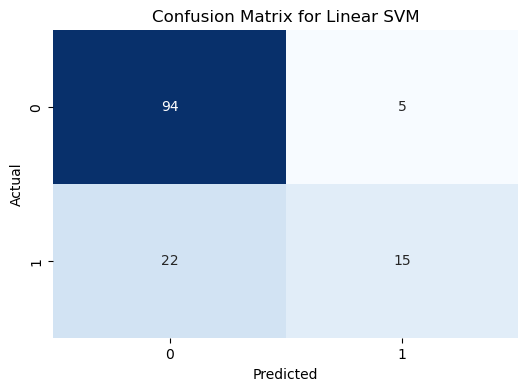

In [50]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f"Confusion Matrix for {metrics['Model']}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [51]:
results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)
results_df

,Model,Training Accuracy,Test Accuracy,Training Precision,Test Precision,Training Recall,Test Recall,Training F1 Score,Test F1 Score
0,MLP,0.952532,0.875000,0.952629,0.875962,0.952532,0.875000,0.951475,0.867377
1,SVM-RBF,0.873418,0.860294,0.870939,0.866715,0.873418,0.860294,0.864564,0.847454
2,Random Forest,1.000000,0.860294,1.000000,0.858880,1.000000,0.860294,1.000000,0.851774
3,Linear SVM,0.810127,0.801471,0.797569,0.793927,0.810127,0.801471,0.783523,0.779714


In [52]:
print("Doing: Logistic Regression" )
model, param_grid = models['Logistic Regression']

metrics, cm = evaluate_model(model, param_grid, X_train, y_train, X_test, y_test)
metrics['Model'] = "Logistic Regression"

Doing: Logistic Regression
Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] END ...............................C=0.1, max_iter=3000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=3000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=3000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=3000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=3000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=3000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=3000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=3000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=3000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=3000; total time=   0.0s
[CV] END ...............................C=0.1, max_iter=4000; total time=   0.0s
[CV] END ............

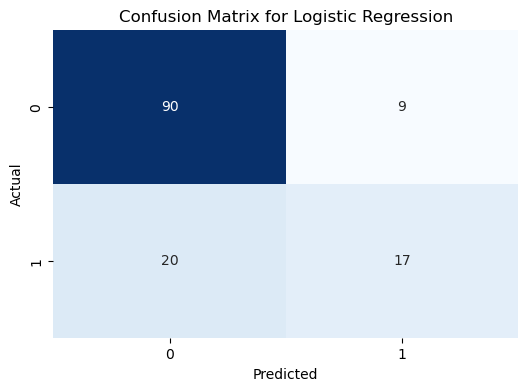

In [53]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f"Confusion Matrix for {metrics['Model']}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [54]:
results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)
results_df

,Model,Training Accuracy,Test Accuracy,Training Precision,Test Precision,Training Recall,Test Recall,Training F1 Score,Test F1 Score
0,MLP,0.952532,0.875000,0.952629,0.875962,0.952532,0.875000,0.951475,0.867377
1,SVM-RBF,0.873418,0.860294,0.870939,0.866715,0.873418,0.860294,0.864564,0.847454
2,Random Forest,1.000000,0.860294,1.000000,0.858880,1.000000,0.860294,1.000000,0.851774
3,Linear SVM,0.810127,0.801471,0.797569,0.793927,0.810127,0.801471,0.783523,0.779714
4,Logistic Regression,0.813291,0.786765,0.799315,0.773473,0.813291,0.786765,0.793408,0.773760


In [55]:
print("Doing: KNN" )
model, param_grid = models['KNN']

metrics, cm = evaluate_model(model, param_grid, X_train, y_train, X_test, y_test)
metrics['Model'] = "KNN"

Doing: KNN
Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END .....................n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ....................n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ....................n_neighb

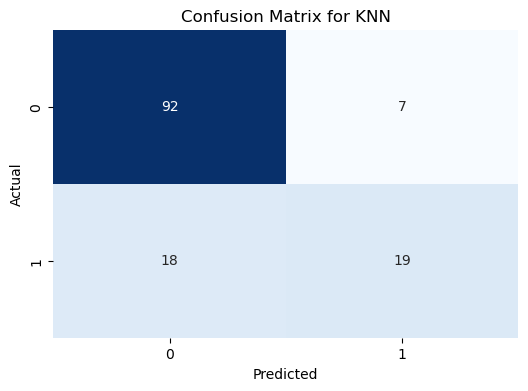

In [56]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f"Confusion Matrix for {metrics['Model']}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [57]:
results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)
results_df

,Model,Training Accuracy,Test Accuracy,Training Precision,Test Precision,Training Recall,Test Recall,Training F1 Score,Test F1 Score
0,MLP,0.952532,0.875000,0.952629,0.875962,0.952532,0.875000,0.951475,0.867377
1,SVM-RBF,0.873418,0.860294,0.870939,0.866715,0.873418,0.860294,0.864564,0.847454
2,Random Forest,1.000000,0.860294,1.000000,0.858880,1.000000,0.860294,1.000000,0.851774
3,Linear SVM,0.810127,0.801471,0.797569,0.793927,0.810127,0.801471,0.783523,0.779714
4,Logistic Regression,0.813291,0.786765,0.799315,0.773473,0.813291,0.786765,0.793408,0.773760
5,KNN,0.895570,0.816176,0.895195,0.807636,0.895570,0.816176,0.889388,0.804966


In [58]:
print("Doing: Decision Tree" )
model, param_grid = models['Decision Tree']

metrics, cm = evaluate_model(model, param_grid, X_train, y_train, X_test, y_test)
metrics['Model'] = "Decision Tree"

Doing: Decision Tree
Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV] END .....................................max_depth=None; total time=   0.0s
[CV] END .....................................max_depth=None; total time=   0.0s
[CV] END .....................................max_depth=None; total time=   0.0s
[CV] END .....................................max_depth=None; total time=   0.0s
[CV] END .....................................max_depth=None; total time=   0.0s
[CV] END .....................................max_depth=None; total time=   0.0s
[CV] END .....................................max_depth=None; total time=   0.0s
[CV] END .....................................max_depth=None; total time=   0.0s
[CV] END .....................................max_depth=None; total time=   0.0s
[CV] END .....................................max_depth=None; total time=   0.0s
[CV] END .......................................max_depth=10; total time=   0.0s
[CV] END ..................

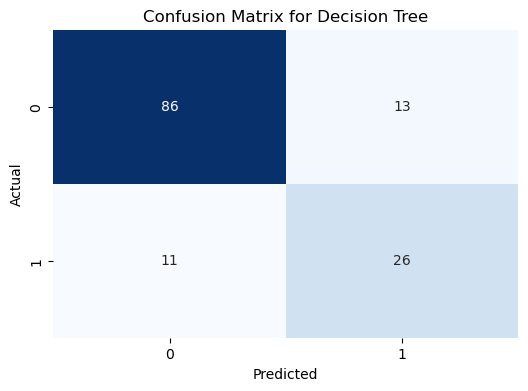

In [59]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f"Confusion Matrix for {metrics['Model']}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [60]:
results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)
results_df

,Model,Training Accuracy,Test Accuracy,Training Precision,Test Precision,Training Recall,Test Recall,Training F1 Score,Test F1 Score
0,MLP,0.952532,0.875000,0.952629,0.875962,0.952532,0.875000,0.951475,0.867377
1,SVM-RBF,0.873418,0.860294,0.870939,0.866715,0.873418,0.860294,0.864564,0.847454
2,Random Forest,1.000000,0.860294,1.000000,0.858880,1.000000,0.860294,1.000000,0.851774
3,Linear SVM,0.810127,0.801471,0.797569,0.793927,0.810127,0.801471,0.783523,0.779714
4,Logistic Regression,0.813291,0.786765,0.799315,0.773473,0.813291,0.786765,0.793408,0.773760
5,KNN,0.895570,0.816176,0.895195,0.807636,0.895570,0.816176,0.889388,0.804966
6,Decision Tree,1.000000,0.823529,1.000000,0.826764,1.000000,0.823529,1.000000,0.824951


In [61]:
print("Doing: Naive Bayes" )
model, param_grid = models['Naive Bayes']

metrics, cm = evaluate_model(model, param_grid, X_train, y_train, X_test, y_test)
metrics['Model'] = "Naive Bayes"

Doing: Naive Bayes
Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


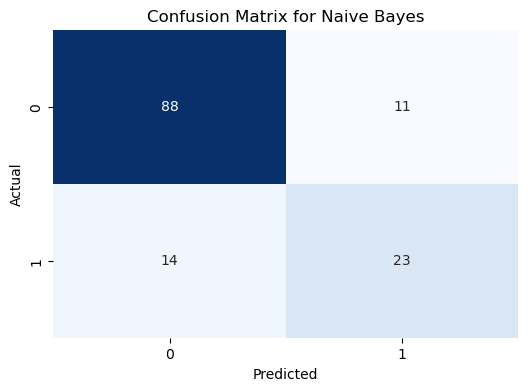

In [62]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f"Confusion Matrix for {metrics['Model']}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [63]:
results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)
results_df

,Model,Training Accuracy,Test Accuracy,Training Precision,Test Precision,Training Recall,Test Recall,Training F1 Score,Test F1 Score
0,MLP,0.952532,0.875000,0.952629,0.875962,0.952532,0.875000,0.951475,0.867377
1,SVM-RBF,0.873418,0.860294,0.870939,0.866715,0.873418,0.860294,0.864564,0.847454
2,Random Forest,1.000000,0.860294,1.000000,0.858880,1.000000,0.860294,1.000000,0.851774
3,Linear SVM,0.810127,0.801471,0.797569,0.793927,0.810127,0.801471,0.783523,0.779714
4,Logistic Regression,0.813291,0.786765,0.799315,0.773473,0.813291,0.786765,0.793408,0.773760
5,KNN,0.895570,0.816176,0.895195,0.807636,0.895570,0.816176,0.889388,0.804966
6,Decision Tree,1.000000,0.823529,1.000000,0.826764,1.000000,0.823529,1.000000,0.824951
7,Naive Bayes,0.806962,0.816176,0.794096,0.812067,0.806962,0.816176,0.796849,0.813665


In [64]:
results_df.T

,0,1,2,3,4,5,6,7
Model,MLP,SVM-RBF,Random Forest,Linear SVM,Logistic Regression,KNN,Decision Tree,Naive Bayes
Training Accuracy,0.952532,0.873418,1.0,0.810127,0.813291,0.89557,1.0,0.806962
Test Accuracy,0.875,0.860294,0.860294,0.801471,0.786765,0.816176,0.823529,0.816176
Training Precision,0.952629,0.870939,1.0,0.797569,0.799315,0.895195,1.0,0.794096
Test Precision,0.875962,0.866715,0.85888,0.793927,0.773473,0.807636,0.826764,0.812067
Training Recall,0.952532,0.873418,1.0,0.810127,0.813291,0.89557,1.0,0.806962
Test Recall,0.875,0.860294,0.860294,0.801471,0.786765,0.816176,0.823529,0.816176
Training F1 Score,0.951475,0.864564,1.0,0.783523,0.793408,0.889388,1.0,0.796849
Test F1 Score,0.867377,0.847454,0.851774,0.779714,0.77376,0.804966,0.824951,0.813665
